## **Final project**

### **Medical Diagnosis**
**Description:** Develop an AI system to assist in diagnosing diseases using medical data.

**Tasks:**

* Collect and preprocess medical data (e.g., images, patient records).
* Implement machine learning models (mainly Convolutional Neural Networks) for disease classification.
* Evaluate and optimize model performance for accuracy and reliability.
* Develop a user-friendly interface for doctors to interact with the system.

# **Exercise 1: Optimization**

<div align = "justify">
Implement the gradient descent algorithm to find the minimum of the following
function:


$$f(x) = x^2 + 4x + 5$$
</div>

<div align = "justify">

**Step 1: Define a function to minimize**

We want to find the minimum of the following function
$$f(x) = x^2 + 4x + 5$$

\
**Step 2: Compute the gradient**

Calculate the gradient, that is the derivative of the function.
$$ \nabla f(x) = \frac{d f(x)}{d x}$$

\
**Step 3: Update x**

Update the parameters $\omega$ and $b$ using the learning rate $\alpha$:

$$x_{n+1} = x_{n} - \alpha \cdot \nabla f(x_{n})$$

Where
$\alpha$ is the learning rate.

Recall...

Small $\alpha$: Slow convergence.

Large $\alpha$: Risk of overlooking the minimum.
</div>

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [109]:
class MinimizeFunction():

  # Constructor method
  def __init__(self, x, learning_rate, iterations_num):
    self._x = x  # Initialize the starting point
    self._learning_rate = learning_rate
    self._iterations_num = iterations_num
    self._x_old = None  # Will store x values after gradient descent
    self._y = None  # Will store function values after gradient descent

  # Define the function to minimize
  def f(self, x):
    return x**2 + (4*x) + 5

  # Use the definition of the derivative
  def first_derivative(self, x, h=1e-6):
    return (self.f(x + h) - self.f(x)) / h

  # Gradient descent algorithm
  def gradient_descent(self):
    # Save the points to plot them later
    self._x_old = np.zeros(self._iterations_num + 1)
    self._y = np.zeros(self._iterations_num + 1)

    self._x_old[0] = self._x  # Save the first point
    self._y[0] = self.f(self._x_old[0])  # Evaluate the point in the function

    print(f"Starting point: (x = {self._x_old[0]}, y = {self._y[0]})\n")

    for i in range(1, self._iterations_num + 1):  # Create the iterations
      # Update the new variable
      self._x_old[i] = self._x_old[i-1] - (self._learning_rate * self.first_derivative(self._x_old[i-1]))

      # Calculate the function value at the new point
      self._y[i] = self.f(self._x_old[i])

      if i % 5 == 0:
        print(f"Iteration {i}: (x = {round(self._x_old[i], 4)}, y = {round(self._y[i], 4)})")

    return self._x_old[-1], self._y[-1]


  # Plot the function and the minimum value
  def graph_minimum(self):
    # This conditional handles a possible error
    if self._x_old is None or self._y is None:
      raise ValueError("You must run gradient_descent() before calling graph_minimum().")

    x_min = self._x_old[-1]
    y_min = self._y[-1] # Obtain the minimum value

    x = np.linspace(x_min - 4.9, x_min + 5.1, 100)  # Define the range around the minimum
    y = [self.f(num) for num in x]  # Calculate function values for each x

    plt.plot(x, y, label="Function", color='blue')
    plt.scatter(self._x_old, self._y, color='orange', label="Steps", s=50)
    plt.scatter(x_min, y_min, color='red', label="Minimum", marker='o', edgecolors='black', s=100)

    plt.title("Function with minimum point using Gradient Descent algorithm")
    plt.xlim(x_min - 1.5, x_min + 1.5) # Set limits in x-axis relative to the minimum
    plt.ylim(y_min - 0.3, y_min + 0.5)  # Set dynamic limits for the y-axis
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()  # Show the labels
    plt.grid()
    plt.show()

In [110]:
initial_value = 1
learning_rate = 0.1
iterations_num = 30

# Running Gradient Descendent method
g_desc = MinimizeFunction(initial_value, learning_rate, iterations_num)
x_min, y_min = g_desc.gradient_descent()
print(f"\nSolution found (x axis): {x_min}")
print(f"Minimum value (y axis): {y_min}")

# This is a robust algorithm since it makes all the computations inside the class,
# so the user won't use some of the methods.

Starting point: (x = 1.0, y = 10.0)

Iteration 5: (x = -1.017, y = 1.9664)
Iteration 10: (x = -1.6779, y = 1.1038)
Iteration 15: (x = -1.8944, y = 1.0111)
Iteration 20: (x = -1.9654, y = 1.0012)
Iteration 25: (x = -1.9887, y = 1.0001)
Iteration 30: (x = -1.9963, y = 1.0)

Solution found (x axis): -1.9962866792576648
Minimum value (y axis): 1.0000137887509353


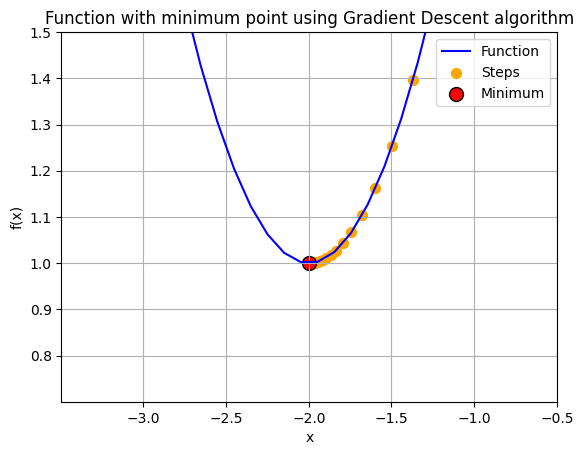

In [111]:
g_desc.graph_minimum()

## **Exercise 2:  Knowledge-based system**

In [112]:
class CrimeCase():

  # Constructor nethod
  def __init__(self, case_description, initial_verdic, facts, appeal_facts):
    # Initializing the case details, verdict, and the facts for the case
    self.case_description = case_description
    self.initial_verdic = initial_verdic

    # Check the input facts and appeal facts

    # Deletes whitespaces for the facts and check if each value has a boolean type
    self.facts = {
    key.strip().lower(): (value if isinstance(value, bool) else str(value).strip())
    for key, value in facts.items()
    }

    self.appeal_facts = {
    key.strip().lower(): (value if isinstance(value, bool) else str(value).strip())
    for key, value in appeal_facts.items()
    }

  def get_facts(self):
    return self.facts


  # Evaluate the case with circumscription logic
  def _apply_circumscription(self):
    """ Default assumption: The person is guilty unless proven otherwise
    The circumscription logic assumes the guilt is true unless contradicting facts are found """
    guilt = self.facts["guilt"]

    # Now, apply the appeal facts, which could negate the default assumption
    for fact, value in self.appeal_facts.items():
        if fact == "guilt":
            guilt = value  # Override the initial guilt value if there's an appeal contradiction

    # Final verdict
    if guilt:
        return "Guilty"
    else:
      return "Innocent"


  # Process the case and return the verdict after applying circumscription logic
  def process_case(self):

    print(f"Crime: {self.case_description['crime']}")
    print(f"\nAccused: {self.case_description['accused']}")

    print("\nFacts:")# Print appeal facts
    for fact, value in self.facts.items():
      print(f"{fact} -({value})-")
    print("")

    print("Initial veredict:", self.initial_verdic)

    print("\nAppeal facts: ")
    for fact, value in self.appeal_facts.items(): # Print appeal facts
      print(f"{fact} -({value})-")
    print("")
    # Apply circumscription logic and get the final verdict after appeal
    final_verdict = self._apply_circumscription()
    print("Veredict after appeal:", final_verdict)

<div align = "justify">

For this code, I chose circumscription logic because it considers an initial prior verdict, which assumes guilt unless contradictory evidence is presented. This model approaches a real-world legal reasoning where a judgment remains valid unless explicitly overturned by new facts.

First, the case is presented with details about the suspect, evidence, and initial verdict. The model assumes the accused is guilty, and this assumption remains valid until new appealing facts come to light. If new evidence contradicts the initial verdict, it may override the previous judgment.

Finally, the model provides the final veredict based on the previous facts.
</div>

<div justify = "align">

### **Case 1: The Mansion Murder**

**Crime:** Murder of the owner of a mansion

**Accused:** The butler

**Reason for guilt:**
* The butler was seen near the crime scene
* A knife with his fingerprints was found
* The butler had a debt with the victim

**Initial verdict:** Guilty

**Appeal:** New evidence was found
* A security video shows the butler was in another room at the time of the crime
* The fingerprints on the knife do not match the butler's

**Expected result:** Innocent
</div>

In [113]:
# Case 1: The Mansion Murder
case_1_description = {
    'crime': 'Murder of the owner of a mansion',
    'accused': 'The butler'
}

# Propositions for facts: Each fact is a boolean (True or False)
case_1_facts = {
    'guilt': True,  # Default assumption: The butler is guilty
    'butler_seen_near_crime_scene': True,
    'knife_fingerprints_match_butler': True,
    'butler_has_debt_with_victim': True
}

# Propositions for appeal facts: New evidence introduced to challenge guilt
case_1_appeal_facts = {
    'guilt': False,  # New evidence contradicts the initial assumption
    'butler_has_alibi': True,
    'knife_fingerprints_match_not_butler': True
}

case_1 = CrimeCase(case_1_description, "Guilty", case_1_facts, case_1_appeal_facts)

# Process the case
case_1.process_case() # Creates an object from the class

Crime: Murder of the owner of a mansion

Accused: The butler

Facts:
guilt -(True)-
butler_seen_near_crime_scene -(True)-
knife_fingerprints_match_butler -(True)-
butler_has_debt_with_victim -(True)-

Initial veredict: Guilty

Appeal facts: 
guilt -(False)-
butler_has_alibi -(True)-
knife_fingerprints_match_not_butler -(True)-

Veredict after appeal: Innocent


<div justify = "align">

### **Case 2: Bank Heist**

**Crime:**  The Bank Heist

**Accused:** A former bank employee

**Reason for guilt:**
* The accused was recently fired and had access to the bank's blueprints
* A witness saw him near the bank on the day of the robbery
* Stolen money was found in his house

**Initial veredict:** Guilty

**Appeal:** New evidence was found
* The witness admits they were mistaken and were not sure they saw the accused
* The money found in his house came from a recent inheritance, not the
robbery.

**Expected result:** Innocent
</div>

In [114]:
# Case 2: The Bank Heist
case_2_description = {
    'crime': 'Bank robbery with hostages',
    'accused': 'A former bank employee'
}

case_2_facts = {
    'guilt': True,  # Initially guilty based on facts
    'recently_fired': True,
    'access_to_bank_blueprints': True,
    'witness_saw_scene': True,
    'money_found_in_house': True
}

case_2_appeal_facts = {
    'guilt': False,  # New evidence makes the accused innocent
    'witness_saw_scene': False,  # Witness admits mistake
    'money_from_inheritance': True  # Money found was from inheritance, not robbery
}

case_2 = CrimeCase(case_2_description, "Guilty", case_2_facts, case_2_appeal_facts)
case_2.process_case()

Crime: Bank robbery with hostages

Accused: A former bank employee

Facts:
guilt -(True)-
recently_fired -(True)-
access_to_bank_blueprints -(True)-
witness_saw_scene -(True)-
money_found_in_house -(True)-

Initial veredict: Guilty

Appeal facts: 
guilt -(False)-
witness_saw_scene -(False)-
money_from_inheritance -(True)-

Veredict after appeal: Innocent


<div justify = "align">

### **Case 3: Traffic accident**

**Crime:** The traffic accident

**Accused:** The car driver

**Reason for guilt:**
* The driver was speeding
* A witness claims the driver ran a red light.
* The driver had alcohol in their blood

**Initial verdict:** Guilty

**Appeal:** New evidence was found
* A traƯic light analysis shows it was green at the time of the accident
* The driver's blood alcohol level was within the legal limit

**Expected result:** Innocent
</div>

In [115]:
# Case 3: The Traffic Accident
case_3_description = {
    'crime': 'A traffic accident resulting in the death of a pedestrian',
    'accused': 'The car driver'
}

case_3_facts = {
    'guilt': True,  # Initially guilty based on facts
    'speeding': True,
    'witness_claimed_red_light': True,
    'alcohol_in_blood': True
}

case_3_appeal_facts = {
    'guilt': False,  # New evidence makes the driver innocent
    'traffic_light_green': True,
    'alcohol_within_legal_limit': True
}

case_3 = CrimeCase(case_3_description, "Guilty", case_3_facts, case_3_appeal_facts)


# Process all cases
case_3.process_case()

Crime: A traffic accident resulting in the death of a pedestrian

Accused: The car driver

Facts:
guilt -(True)-
speeding -(True)-
witness_claimed_red_light -(True)-
alcohol_in_blood -(True)-

Initial veredict: Guilty

Appeal facts: 
guilt -(False)-
traffic_light_green -(True)-
alcohol_within_legal_limit -(True)-

Veredict after appeal: Innocent


## **Exercise 3: Bayesian and Fuzzy system**

<div align = "justify">

### **Case 1: Emotion detection in text**

System that detects and classifies emotions in text messages using Bayesian techniques.

This can be useful for applications such as sentiment analysis in social media or customer support.

</div>

In [116]:
# Upload data
emotions_prob = {
    'happy': 0.4,
    'sad': 0.3,
    'angry': 0.3
}

# Conditional probabilities
# For example, the first value: P(joyful | happy) = 0.25
words_prob = {
    'happy': {'happy': 0.25, 'joyful': 0.125, 'great': 0.125, 'sad': 0.05},
    'sad': {'happy': 0.05, 'joyful': 0.02, 'great': 0.03, 'sad': 0.20},
    'angry': {'happy': 0.10, 'joyful': 0.03, 'great': 0.02, 'sad': 0.05}
}

In [117]:
def predict_emotion(text):
  words = text.lower().split()  # Preprocessing: lowercasing and tokenizing

  emotions = ['happy', 'sad', 'angry']
  emotion_scores = {}
  total_prob = 0  # This will store the total P(W) for all emotions

  # Check if there are any valid words in the text that exist in the probability tables
  valid_words = [word for word in words if any(word in words_prob[emotion] for emotion in emotions)]

  if not valid_words: # If indeed this is true, the not returns a true. So initiates the if
    return "There are not any of these words in the database."

  # Calculate the total probability P(W) for the word list
  for word in words:
    word_prob = 0

    for emotion in emotions:
        if word in words_prob[emotion]:
            word_prob += emotions_prob[emotion] * words_prob[emotion].get(word, 1e-6)  # Small probability for unknown words
    total_prob += word_prob

  # Calculate the posterior probability for each emotion
  for emotion in emotions:
    sing_prob = emotions_prob[emotion]  # P(E)
    conditional_prob = 1  # Multiply all the conditional probabilities of words given the emotion

    for word in words:
        if word in words_prob[emotion]:
            conditional_prob *= words_prob[emotion].get(word, 1e-6)  # P(W|E) for each word

    posterior_prob = (sing_prob * conditional_prob) / total_prob  # Apply Bayes' Theorem to compute P(E|W)
    emotion_scores[emotion] = posterior_prob

    # Display probabilities for the user
    print(f"Emotion: {emotion}")
    print(f"P(E): {sing_prob}")
    print(f"Conditional probabilities P(W|E):")
    for word in words:
        print(f"  {word}: {words_prob[emotion].get(word, 1e-6)}")
    print(f"Total P(W): {total_prob}")
    print(f"P(E|W): {round(posterior_prob, 6)}")
    print("-" * 40)

  # Return the emotion with the highest score
  return max(emotion_scores, key=emotion_scores.get)

In [129]:
# Demonstration
print("Please, type a sentence:")
example_sentence = input()  # This allows the user to input a sentence manually
print()
predicted_emotion = predict_emotion(example_sentence)
print(f"The predicted emotion is: {predicted_emotion}")

Please, type a sentence:
Today it is kinda a sad day. Nevertheless I feel great and joyful.

Emotion: happy
P(E): 0.4
Conditional probabilities P(W|E):
  today: 1e-06
  it: 1e-06
  is: 1e-06
  kinda: 1e-06
  a: 1e-06
  sad: 0.05
  day.: 1e-06
  nevertheless: 1e-06
  i: 1e-06
  feel: 1e-06
  great: 0.125
  and: 1e-06
  joyful.: 1e-06
Total P(W): 0.16
P(E|W): 0.015625
----------------------------------------
Emotion: sad
P(E): 0.3
Conditional probabilities P(W|E):
  today: 1e-06
  it: 1e-06
  is: 1e-06
  kinda: 1e-06
  a: 1e-06
  sad: 0.2
  day.: 1e-06
  nevertheless: 1e-06
  i: 1e-06
  feel: 1e-06
  great: 0.03
  and: 1e-06
  joyful.: 1e-06
Total P(W): 0.16
P(E|W): 0.01125
----------------------------------------
Emotion: angry
P(E): 0.3
Conditional probabilities P(W|E):
  today: 1e-06
  it: 1e-06
  is: 1e-06
  kinda: 1e-06
  a: 1e-06
  sad: 0.05
  day.: 1e-06
  nevertheless: 1e-06
  i: 1e-06
  feel: 1e-06
  great: 0.02
  and: 1e-06
  joyful.: 1e-06
Total P(W): 0.16
P(E|W): 0.001875
---

<div align = "justify">

### **Case 2: Fuzzy logic for smart home lighting control**

System that adjusts the lighting in a smart home based on the time of day and the occupancy of the rooms using fuzzy logic.

The goal is to maintain optimal lighting conditions for comfort and energy eficiency.

</div>

In [119]:
!pip install numpy scikit-fuzzy

In [120]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

In [121]:
# Definition of input and output variables
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), 'time_of_day')  # Time of day (in hours)
occupancy = ctrl.Antecedent(np.arange(0, 2, 1), 'occupancy')  # Occupancy (0: Unoccupied, 1: Occupied)

# Output variable
light_intensity = ctrl.Consequent(np.arange(0, 11, 1), 'light_intensity')  # Lighting intensity (0: Off, 10: High)

# Membership functions for time of day (input)
time_of_day['Morning'] = fuzz.trimf(time_of_day.universe, [0, 6, 12])  # 0 to 6 AM to 12 PM
time_of_day['Afternoon'] = fuzz.trimf(time_of_day.universe, [12, 12, 18])  # 12 PM to 6 PM
time_of_day['Evening'] = fuzz.trimf(time_of_day.universe, [18, 18, 21])  # 6 PM to 9 PM
time_of_day['Night'] = fuzz.trimf(time_of_day.universe, [21, 21, 24])  # 10 PM to 12 AM

# Membership functions for occupancy (input)
occupancy['Occupied'] = fuzz.trimf(occupancy.universe, [0, 1, 1])
occupancy['Unoccupied'] = fuzz.trimf(occupancy.universe, [0, 0, 1])

# Membership functions for lighting intensity (output)
light_intensity['Off'] = fuzz.trimf(light_intensity.universe, [0, 0, 1])
light_intensity['Low'] = fuzz.trimf(light_intensity.universe, [1, 3, 5])
light_intensity['Medium'] = fuzz.trimf(light_intensity.universe, [4, 6, 7])
light_intensity['High'] = fuzz.trimf(light_intensity.universe, [6, 10, 10])

# Define fuzzy rules
rule1 = ctrl.Rule(time_of_day['Morning'] & occupancy['Occupied'], light_intensity['Medium'])
rule2 = ctrl.Rule(time_of_day['Morning'] & occupancy['Unoccupied'], light_intensity['Off'])
rule3 = ctrl.Rule(time_of_day['Afternoon'] & occupancy['Occupied'], light_intensity['Low'])
rule4 = ctrl.Rule(time_of_day['Afternoon'] & occupancy['Unoccupied'], light_intensity['Off'])
rule5 = ctrl.Rule(time_of_day['Evening'] & occupancy['Occupied'], light_intensity['High'])
rule6 = ctrl.Rule(time_of_day['Evening'] & occupancy['Unoccupied'], light_intensity['Low'])
rule7 = ctrl.Rule(time_of_day['Night'] & occupancy['Occupied'], light_intensity['High'])
rule8 = ctrl.Rule(time_of_day['Night'] & occupancy['Unoccupied'], light_intensity['Off'])

# There were added some extra rules in order to handle diferent inputs given for the user,
# mainly for the unoccupied category

# Create the fuzzy control system (add the rules)
lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                    rule7, rule8])
lighting_sim = ctrl.ControlSystemSimulation(lighting_ctrl)

In [122]:
# Example 1

# Time of day = 7 AM (Morning) and occupied = 1 (Occupied)
lighting_sim.input['time_of_day'] = 7 # 7 AM
lighting_sim.input['occupancy'] = 1 # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 5.65873


In [123]:
# Example 2

# Time of day = 1 PM (Afternoon) and unoccupied = 0
lighting_sim.input['time_of_day'] = 1  # 1 PM
lighting_sim.input['occupancy'] = 0 # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 0.4596


In [124]:
# Example 3

# Time of day = 7 PM (Evening) and occupied = 1
lighting_sim.input['time_of_day'] = 19  # 7 PM
lighting_sim.input['occupancy'] = 1  # Occupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 8.55556


In [125]:
# Example 4

# Time of day = 1 PM (Afternoon) and unoccupied = 0
lighting_sim.input['time_of_day'] = 13  # 1 PM
lighting_sim.input['occupancy'] = 0 # Unoccupied

# Compute the result
lighting_sim.compute()

# Display the result
print("Lighting Intensity:", round(lighting_sim.output['light_intensity'], 5))

Lighting Intensity: 0.34127


#### **Plots**

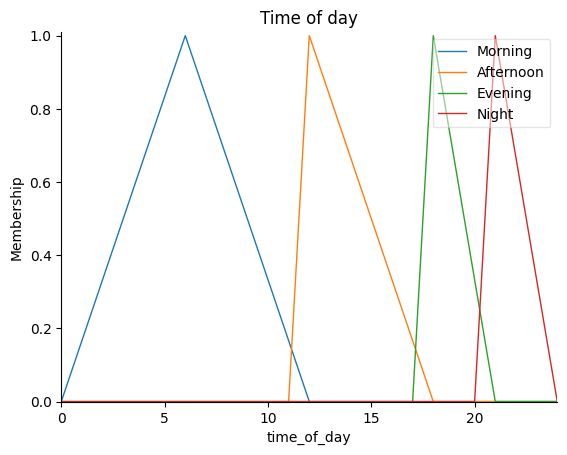

In [126]:
# Graphs
time_of_day.view()
plt.title("Time of day")
plt.show()

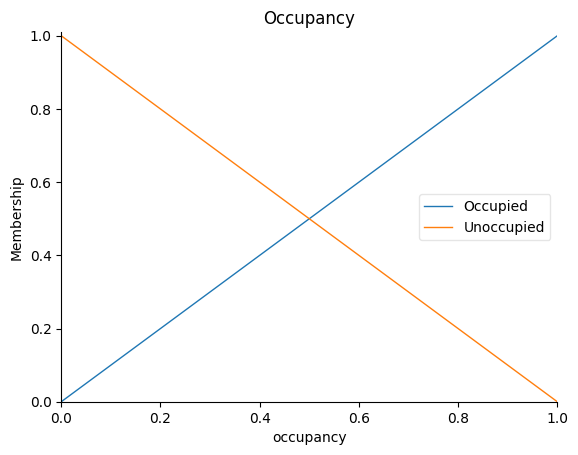

In [127]:
occupancy.view()
plt.title("Occupancy")
plt.show()

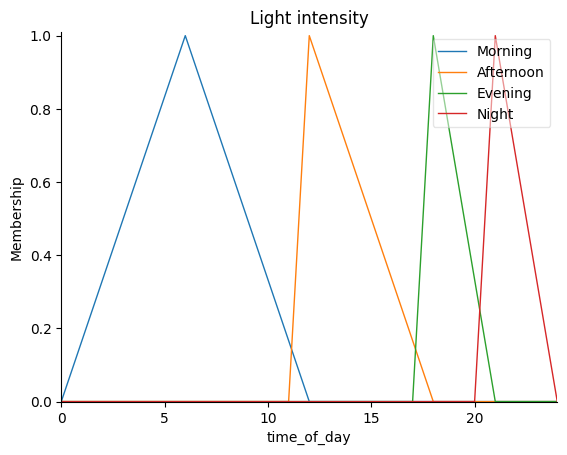

In [128]:
time_of_day.view()
plt.title("Light intensity")
plt.show()